In [127]:
import os
import hashlib
import random
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [63]:
df = pd.read_csv("phones.csv")

In [64]:
df.sample(10)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
754,Infinix,Hot 50 5G,NaN,8GB,16MP,50MP,MediaTek Dimensity 810,"5,200mAh",6.78 inches,USD 289,2024
406,NaN,Reno3 5G 128GB,NaN,8GB,32MP,64MP + 8MP + 2MP + 2MP,Dimensity 1000L,"4,025mAh",6.4 inches,USD 249,2019
710,Tecno,Megapad 11 256GB,450g,8GB,13MP,50MP,MediaTek G99,"8,000mAh",11 inches,USD 349,2024
516,Realme,Pad Mini 32GB,372g,3GB,5MP,8MP,Unisoc T616,"6,400mAh",8.7 inches,USD 160,2022
173,Samsung,Galaxy Tab A9+ 128GB,480g,8GB,5MP,8MP,Snapdragon 695,7040mAh,11 inches,USD 229,2023
17,Apple,iPhone 15 Plus 512GB,NaN,6GB,12MP,48MP,A16 Bionic,"4,300mAh",6.7 inches,"USD 1,049",2023
77,Apple,iPhone XR 64GB,194g,3GB,7MP,12MP + 12MP,A12 Bionic,"2,942mAh",6.1 inches,USD 749,2018
420,Oppo,A49 5G 128GB,185g,4GB,8MP,13MP + 2MP,MediaTek Dimensity 700,"4,000mAh",6.5 inches,USD 129,2020
633,Huawei,P50E,181g,8GB,13MP,50MP,Snapdragon 778G 4G,"4,100mAh",6.5 inches,USD 649,2022
747,Tecno,Pova 5 256GB,230g,8GB,16MP,50MP,MediaTek Helio G99,"6,000mAh",6.8 inches,USD 329,2024


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company Name          854 non-null    object
 1   Model Name            930 non-null    object
 2   Mobile Weight         733 non-null    object
 3   RAM                   930 non-null    object
 4   Front Camera          930 non-null    object
 5   Back Camera           930 non-null    object
 6   Processor             930 non-null    object
 7   Battery Capacity      930 non-null    object
 8   Screen Size           930 non-null    object
 9   Launched Price (USA)  921 non-null    object
 10  Launched Year         930 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 80.1+ KB


In [66]:
df["Company Name"].unique()

array(['Apple', nan, 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo',
       'Realme', 'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia',
       'Sony', 'Google', 'Tecno', 'Infinix', 'Honor', 'POCO'],
      dtype=object)

In [67]:
df["Launched Price (USA)"].unique()

array(['USD 799', 'USD 849', 'USD 899', 'USD 949', 'USD 999', 'USD 1,049',
       'USD 1,099', 'USD 1,199', 'USD 1,299', 'USD 1,399', 'USD 699', nan,
       'USD 1,249', 'USD 749', 'USD 599', 'USD 329', 'USD 429', 'USD 399',
       'USD 499', 'USD 1,599', 'USD 1,799', 'USD 1,899', 'USD 449',
       'USD 349', 'USD 299', 'USD 249', 'USD 199', 'USD 179', 'USD 169',
       'USD 129', 'USD 1,499', 'USD 549', 'USD 229', 'USD 149', 'USD 649',
       'USD 99', 'USD 219', 'USD 139', 'USD 159', 'USD 269', 'USD 319',
       'USD 239', 'USD 279', 'USD 189', 'USD 259', 'USD 470', 'USD 500',
       'USD 380', 'USD 400', 'USD 420', 'USD 360', 'USD 340', 'USD 320',
       'USD 270', 'USD 290', 'USD 250', 'USD 220', 'USD 240', 'USD 300',
       'USD 200', 'USD 260', 'USD 180', 'USD 160', 'USD 210', 'USD 230',
       'USD 130', 'USD 170', 'USD 190', 'USD 150', 'USD 440', 'USD 330',
       'USD 350', 'USD 280', 'USD 310', 'USD 634.99', 'USD 790.77',
       'USD 374.90', 'USD 399.00', 'USD 349.00', 'USD 

In [68]:
df.isna().sum()

Company Name             76
Model Name                0
Mobile Weight           197
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      9
Launched Year             0
dtype: int64

In [69]:
def preprocess_launched_year_and_battery_cap(value):
    if not pd.isna(value):
        value = value.replace(',', '')
        values = re.findall(r'\d+', value)
        return int(values[0])
    return value

In [70]:
df["Launched Price (USA)"] = df["Launched Price (USA)"].apply(preprocess_launched_year_and_battery_cap)

In [71]:
df["Battery Capacity"] = df["Battery Capacity"].apply(preprocess_launched_year_and_battery_cap)

In [72]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year
0,Apple,iPhone 16 128GB,NaN,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,799.0,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,849.0,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,899.0,2024
3,NaN,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,899.0,2024
4,NaN,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,949.0,2024


In [73]:
df["Model Name"].unique()

array(['iPhone 16 128GB', 'iPhone 16 256GB', 'iPhone 16 512GB',
       'iPhone 16 Plus 128GB', 'iPhone 16 Plus 256GB',
       'iPhone 16 Plus 512GB', 'iPhone 16 Pro 128GB',
       'iPhone 16 Pro 256GB', 'iPhone 16 Pro 512GB',
       'iPhone 16 Pro Max 128GB', 'iPhone 16 Pro Max 256GB',
       'iPhone 16 Pro Max 512GB', 'iPhone 15 128GB', 'iPhone 15 256GB',
       'iPhone 15 512GB', 'iPhone 15 Plus 128GB', 'iPhone 15 Plus 256GB',
       'iPhone 15 Plus 512GB', 'iPhone 15 Pro 128GB',
       'iPhone 15 Pro 256GB', 'iPhone 15 Pro 512GB',
       'iPhone 15 Pro Max 128GB', 'iPhone 15 Pro Max 256GB',
       'iPhone 15 Pro Max 512GB', 'iPhone 14 128GB', 'iPhone 14 256GB',
       'iPhone 14 512GB', 'iPhone 14 Plus 128GB', 'iPhone 14 Plus 256GB',
       'iPhone 14 Plus 512GB', 'iPhone 14 Pro 128GB',
       'iPhone 14 Pro 256GB', 'iPhone 14 Pro 512GB',
       'iPhone 14 Pro Max 128GB', 'iPhone 14 Pro Max 256GB',
       'iPhone 14 Pro Max 512GB', 'iPhone 13 mini 128GB',
       'iPhone 13 mini 256G

In [74]:
def preprocess_storage_for_storage_cap(value):
    if not pd.isna(value):
        match = re.search(r'(\d+)(GB|TB)', value)
        if match:
            num = int(match.group(1))
            if match.group(2) == 'TB':  # конвертира TB во GB
                num *= 1000
            return num
    return np.nan

In [75]:
df["Storage (GB)"] = df["Model Name"].apply(preprocess_storage_for_storage_cap)
df["Storage (GB)"] = df["Storage (GB)"].astype('Int64')
df.drop(columns=["Model Name"], inplace=True)

In [76]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year,Storage (GB)
0,Apple,NaN,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,799.0,2024,128
1,Apple,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,849.0,2024,256
2,Apple,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,899.0,2024,512
3,NaN,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,899.0,2024,128
4,NaN,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,949.0,2024,256


In [77]:
df.isna().sum()

Company Name             76
Mobile Weight           197
RAM                       0
Front Camera              0
Back Camera               0
Processor                 0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      9
Launched Year             0
Storage (GB)            152
dtype: int64

In [78]:
df["Mobile Weight"].unique()

array([nan, '174g', '203g', '206g', '221g', '171g', '172g', '140g',
       '204g', '238g', '135g', '164g', '189g', '228g', '194g', '188g',
       '226g', '177g', '208g', '458g', '490g', '300.5g', '468g', '682g',
       '708g', '234g', '196g', '168g', '195g', '167g', '254g', '187g',
       '263g', '199g', '190g', '202g', '198g', '192g', '235g', '191g',
       '178g', '165g', '143g', '229g', '732g', '586g', '498g', '523g',
       '726g', '503g', '480g', '366g', '433g', '674g', '426g', '205g',
       '200g', '183g', '180g', '173g', '185g', '162g', '210g', '215g',
       '550g', '610g', '223g', '181g', '150g', '146g', '163g', '153g',
       '155g', '176g', '201g', '193g', '159g', '156g', '179g', '182g',
       '510g', '500g', '560g', '520g', '540g', '186g', '175g', '533g',
       '218g', '207g', '233g', '184g', '222.8g', '440g', '482g', '466g',
       '499g', '372g', '465g', '209g', '166g', '170g', '169g', '295g',
       '255g', '197g', '239g', '225g', '220g', '245g', '161g', '508g',
     

In [79]:
def preprocess_weight(value):
    if not pd.isna(value):
        values = re.findall(r'\d+', value)
        return int(values[0])
    return value

In [80]:
df["Mobile Weight"] = df["Mobile Weight"].apply( preprocess_weight)

In [81]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year,Storage (GB)
0,Apple,NaN,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,799.0,2024,128
1,Apple,174.0,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,849.0,2024,256
2,Apple,174.0,6GB,12MP,48MP,A17 Bionic,3600,6.1 inches,899.0,2024,512
3,NaN,203.0,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,899.0,2024,128
4,NaN,203.0,6GB,12MP,48MP,A17 Bionic,4200,6.7 inches,949.0,2024,256


In [82]:
df["RAM"].unique()

array(['6GB', '8GB', '4GB', '3GB', '12GB', '2GB', '1.5GB', '16GB', '10GB',
       '1GB', '8GB / 12GB'], dtype=object)

In [83]:
def preprocess_max_decimals(value):
    if not pd.isna(value):
        values = re.findall(r"\d+\.?\d*", value)  # i za decimali da faka
        return max([float(v) for v in values])
    return value

In [84]:
df["RAM"] = df["RAM"].apply(preprocess_max_decimals)

In [85]:
df["Front Camera"].unique()

array(['12MP', '12MP / 4K', '7MP', '10MP', '32MP', '13MP', '5MP', '16MP',
       '8MP', '12MP + 12MP', '2MP', '44MP', '24MP', '20MP+8MP', '20MP',
       '50MP', '25MP', '60MP', '10.7MP', 'Dual 32MP', 'Dual 60MP',
       '60MP (ultrawide) + 8MP (telephoto)', '60MP + 8MP', '11.1MP',
       '10.8MP', '10.5MP', '48MP', '42MP', '10MP, 4MP (UDC)'],
      dtype=object)

In [86]:
df["Front Camera"] = df["Front Camera"].apply(preprocess_max_decimals)

In [87]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year,Storage (GB)
0,Apple,NaN,6.0,12.0,48MP,A17 Bionic,3600,6.1 inches,799.0,2024,128
1,Apple,174.0,6.0,12.0,48MP,A17 Bionic,3600,6.1 inches,849.0,2024,256
2,Apple,174.0,6.0,12.0,48MP,A17 Bionic,3600,6.1 inches,899.0,2024,512
3,NaN,203.0,6.0,12.0,48MP,A17 Bionic,4200,6.7 inches,899.0,2024,128
4,NaN,203.0,6.0,12.0,48MP,A17 Bionic,4200,6.7 inches,949.0,2024,256


In [88]:
df["Back Camera"].unique()

array(['48MP', '50MP + 12MP', '48MP + 12MP', '12MP + 12MP', '12MP',
       '12MP + 12MP + 12MP', '8MP', '12MP + 10MP', '200MP + 12MP',
       '108MP + 12MP', '48MP + 8MP', '50MP + 5MP', '50MP + 2MP',
       '108MP + 8MP', '50MP + 8MP', '13MP + 2MP', '12MP + 16MP', '50MP',
       '16MP', '16MP + 5MP', '13MP', '13MP + 5MP', '16MP + 8MP',
       '13MP + 8MP', '13MP + 6MP', '5MP', '50MP + 48MP', '108MP',
       '64MP + 2MP', '48MP + 48MP', '48MP + 50MP', '48MP + 16MP',
       '48MP + 5MP', '64MP + 8MP', '20MP + 16MP', '16MP + 20MP',
       '50MP + 16MP', '200MP', '64MP', '13MP+2MP', '48MP + 64MP + 48MP',
       '50MP + 32MP + 48MP', '50MP + 50MP + 50MP', '50MP + 50MP',
       '50MP + 8MP + 2MP', '50MP + 50MP + 8MP', '50MP + 32MP + 8MP',
       '64MP + 8MP + 2MP', '8MP + 2MP', '50MP + 50MP + 64MP',
       '50MP + 50MP + 13MP', '50MP + 48MP + 32MP', '64MP + 32MP + 8MP',
       '50MP + 64MP + 8MP', '64MP + 8MP + 2MP + 2MP',
       '50MP + 13MP + 16MP + 2MP', '50MP + 16MP + 13MP + 2MP',
      

In [89]:
df["Back Camera"] = df["Back Camera"].apply(preprocess_max_decimals)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          854 non-null    object 
 1   Mobile Weight         733 non-null    float64
 2   RAM                   930 non-null    float64
 3   Front Camera          930 non-null    float64
 4   Back Camera           930 non-null    float64
 5   Processor             930 non-null    object 
 6   Battery Capacity      930 non-null    int64  
 7   Screen Size           930 non-null    object 
 8   Launched Price (USA)  921 non-null    float64
 9   Launched Year         930 non-null    int64  
 10  Storage (GB)          778 non-null    Int64  
dtypes: Int64(1), float64(5), int64(2), object(3)
memory usage: 81.0+ KB


In [91]:
df["Storage (GB)"].unique()

<IntegerArray>
[128, 256, 512, 64, 32, 1000, 2000, 16, <NA>]
Length: 9, dtype: Int64

In [92]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (USA),Launched Year,Storage (GB)
0,Apple,NaN,6.0,12.0,48.0,A17 Bionic,3600,6.1 inches,799.0,2024,128
1,Apple,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.1 inches,849.0,2024,256
2,Apple,174.0,6.0,12.0,48.0,A17 Bionic,3600,6.1 inches,899.0,2024,512
3,NaN,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.7 inches,899.0,2024,128
4,NaN,203.0,6.0,12.0,48.0,A17 Bionic,4200,6.7 inches,949.0,2024,256


In [93]:
df["Screen Size"].unique()

array(['6.1 inches', '6.7 inches', '5.4 inches', '5.8 inches',
       '6.5 inches', '10.9 inches', '10.2 inches', '7.9 inches',
       '11 inches', '12.9 inches', '13 inches', '6.8 inches',
       '6.6 inches', '7.6 inches', '6.4 inches', '6.9 inches',
       '6.3 inches', '5.3 inches', '6.0 inches', '5.5 inches',
       '5.7 inches', '5.2 inches', '14.6 inches', '12.4 inches',
       '8.7 inches', '10.5 inches', '8 inches', '10.1 inches',
       '6.74 inches', '6.72 inches', '7.8 inches', '6.55 inches',
       '6.43 inches', '6.49 inches', '6.52 inches', '6.78 inches',
       '6.59 inches', '6.44 inches', '6.41 inches', '6.01 inches',
       '6.67 inches', '6.28 inches', '11.61 inches', '6.31 inches',
       '6.58 inches', '6.38 inches', '6.56 inches', '5.88 inches',
       '6.22 inches', '5.0 inches', '6.51 inches', '6.35 inches',
       '6.53 inches', '6.39 inches', '6.47 inches', '10.4 inches',
       '12.3 inches', '7.82 inches', '6.83 inches', '11.6 inches',
       '12.1 inches',

In [94]:
df["Screen Size"] = df["Screen Size"].apply(preprocess_max_decimals)

In [95]:
df["Screen Size"].unique()

array([ 6.1 ,  6.7 ,  5.4 ,  5.8 ,  6.5 , 10.9 , 10.2 ,  7.9 , 11.  ,
       12.9 , 13.  ,  6.8 ,  6.6 ,  7.6 ,  6.4 ,  6.9 ,  6.3 ,  5.3 ,
        6.  ,  5.5 ,  5.7 ,  5.2 , 14.6 , 12.4 ,  8.7 , 10.5 ,  8.  ,
       10.1 ,  6.74,  6.72,  7.8 ,  6.55,  6.43,  6.49,  6.52,  6.78,
        6.59,  6.44,  6.41,  6.01,  6.67,  6.28, 11.61,  6.31,  6.58,
        6.38,  6.56,  5.88,  6.22,  5.  ,  6.51,  6.35,  6.53,  6.39,
        6.47, 10.4 , 12.3 ,  7.82,  6.83, 11.6 , 12.1 ,  6.82,  7.1 ,
       11.5 ,  6.73,  6.36,  6.09,  6.57,  7.85,  7.93,  7.92, 12.2 ,
       13.2 ,  5.6 ,  6.2 ,  6.34,  6.71,  9.7 ,  6.95,  6.85,  6.63,
        7.09,  6.81,  6.76, 12.  , 12.6 , 13.5 ,  6.79])

In [97]:
df["Processor"].unique()

array(['A17 Bionic', 'A17 Pro', 'A16 Bionic', 'A15 Bionic', 'A14 Bionic',
       'A13 Bionic', 'A11 Bionic', 'A12 Bionic', 'A12Z Bionic',
       'Exynos 2400', 'Snapdragon 8 Gen 2', 'Exynos 2200',
       'Snapdragon 8 Gen 1', 'Exynos 1380', 'MediaTek Dimensity 1080',
       'MediaTek Helio G99', 'Exynos 850', 'Exynos 1280',
       'MediaTek Helio P35', 'Exynos 990', 'Exynos 9825',
       'Snapdragon 450', 'Exynos 7870', 'Snapdragon 425', 'Exynos 7570',
       'Snapdragon 653', 'Snapdragon 625', 'Snapdragon 617',
       'Snapdragon 888', 'Snapdragon 695', 'Unisoc T618',
       'MediaTek Helio P22T', 'Snapdragon 778G', 'Exynos 9810',
       'Spreadtrum SC8830', 'Qualcomm MSM8916', 'Snapdragon 8 Gen 3',
       'MediaTek Dimensity 9000', 'Snapdragon 782G',
       'MediaTek Dimensity 6020', 'Snapdragon 8+ Gen 1',
       'MediaTek Dimensity 1300', 'MediaTek Dimensity 1200-AI',
       'Snapdragon 480', 'Qualcomm Snapdragon 460', 'Snapdragon 865',
       'Snapdragon 870', 'MediaTek Dimensity 9

In [98]:
df.drop(columns=['Processor'], inplace=True)

In [99]:
label_encoder = LabelEncoder()

In [100]:
df['Company Name'] = label_encoder.fit_transform(df['Company Name'])
label_encoder.classes_

array(['Apple', 'Google', 'Honor', 'Huawei', 'Infinix', 'Lenovo',
       'Motorola', 'Nokia', 'OnePlus', 'Oppo', 'POCO', 'Realme',
       'Samsung', 'Sony', 'Tecno', 'Vivo', 'Xiaomi', 'iQOO', nan],
      dtype=object)

In [102]:
df.loc[df['Company Name'] == 18, 'Company Name'] = np.nan

In [103]:
df.head()

,Company Name,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (USA),Launched Year,Storage (GB)
0,0.0,NaN,6.0,12.0,48.0,3600,6.1,799.0,2024,128
1,0.0,174.0,6.0,12.0,48.0,3600,6.1,849.0,2024,256
2,0.0,174.0,6.0,12.0,48.0,3600,6.1,899.0,2024,512
3,NaN,203.0,6.0,12.0,48.0,4200,6.7,899.0,2024,128
4,NaN,203.0,6.0,12.0,48.0,4200,6.7,949.0,2024,256


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          854 non-null    float64
 1   Mobile Weight         733 non-null    float64
 2   RAM                   930 non-null    float64
 3   Front Camera          930 non-null    float64
 4   Back Camera           930 non-null    float64
 5   Battery Capacity      930 non-null    int64  
 6   Screen Size           930 non-null    float64
 7   Launched Price (USA)  921 non-null    float64
 8   Launched Year         930 non-null    int64  
 9   Storage (GB)          778 non-null    Int64  
dtypes: Int64(1), float64(7), int64(2)
memory usage: 73.7 KB


In [105]:
df.isna().sum()

Company Name             76
Mobile Weight           197
RAM                       0
Front Camera              0
Back Camera               0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      9
Launched Year             0
Storage (GB)            152
dtype: int64

In [106]:
df.dropna(subset=["Launched Price (USA)"], axis=0, inplace=True)

<Axes: >

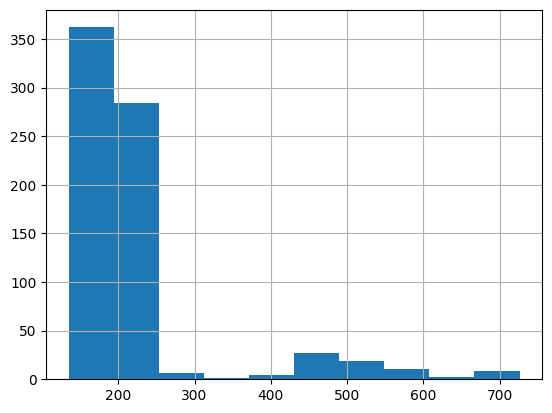

In [108]:
df["Mobile Weight"].hist()

<Axes: >

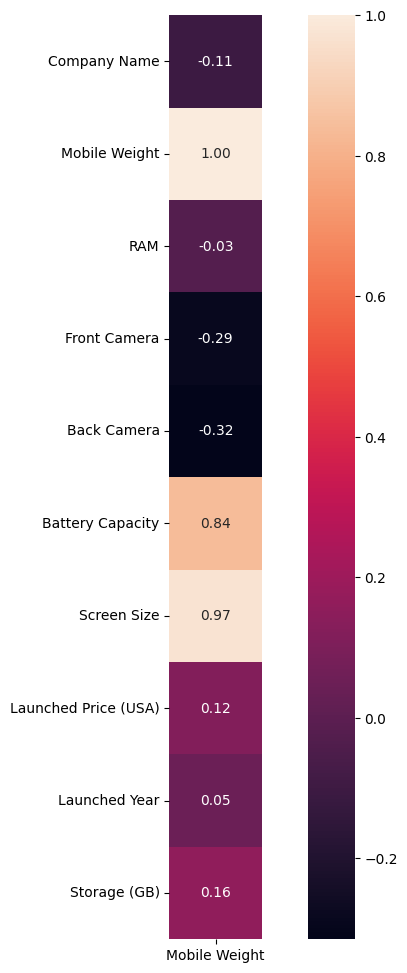

In [109]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Mobile Weight"]], annot=True, fmt=".2f", square=True)

In [110]:
cols = ["Mobile Weight", "Screen Size","Battery Capacity"]
iterative_imputer = IterativeImputer()
df[cols] = iterative_imputer.fit_transform(df[cols])
df.isnull().sum()

Company Name             76
Mobile Weight             0
RAM                       0
Front Camera              0
Back Camera               0
Battery Capacity          0
Screen Size               0
Launched Price (USA)      0
Launched Year             0
Storage (GB)            151
dtype: int64

<Axes: >

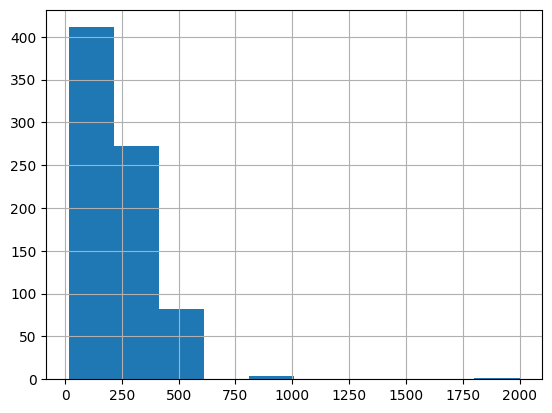

In [112]:
df["Storage (GB)"].hist()

In [114]:
median_imputer = SimpleImputer(strategy="median")
df[['Storage (GB)']] = median_imputer.fit_transform(df[['Storage (GB)']])

In [115]:
df.isna().sum()

Company Name            76
Mobile Weight            0
RAM                      0
Front Camera             0
Back Camera              0
Battery Capacity         0
Screen Size              0
Launched Price (USA)     0
Launched Year            0
Storage (GB)             0
dtype: int64

In [116]:
knn_imputer = KNNImputer(n_neighbors=9)
df['Company Name'] = knn_imputer.fit_transform(df[['Company Name']])

In [117]:
df.isna().sum()

Company Name            0
Mobile Weight           0
RAM                     0
Front Camera            0
Back Camera             0
Battery Capacity        0
Screen Size             0
Launched Price (USA)    0
Launched Year           0
Storage (GB)            0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 921 entries, 0 to 929
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company Name          921 non-null    float64
 1   Mobile Weight         921 non-null    float64
 2   RAM                   921 non-null    float64
 3   Front Camera          921 non-null    float64
 4   Back Camera           921 non-null    float64
 5   Battery Capacity      921 non-null    float64
 6   Screen Size           921 non-null    float64
 7   Launched Price (USA)  921 non-null    float64
 8   Launched Year         921 non-null    int64  
 9   Storage (GB)          921 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 79.1 KB


<Axes: >

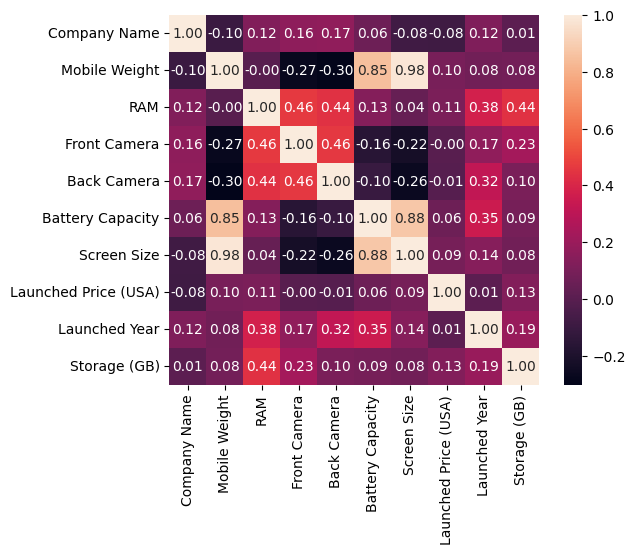

In [119]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

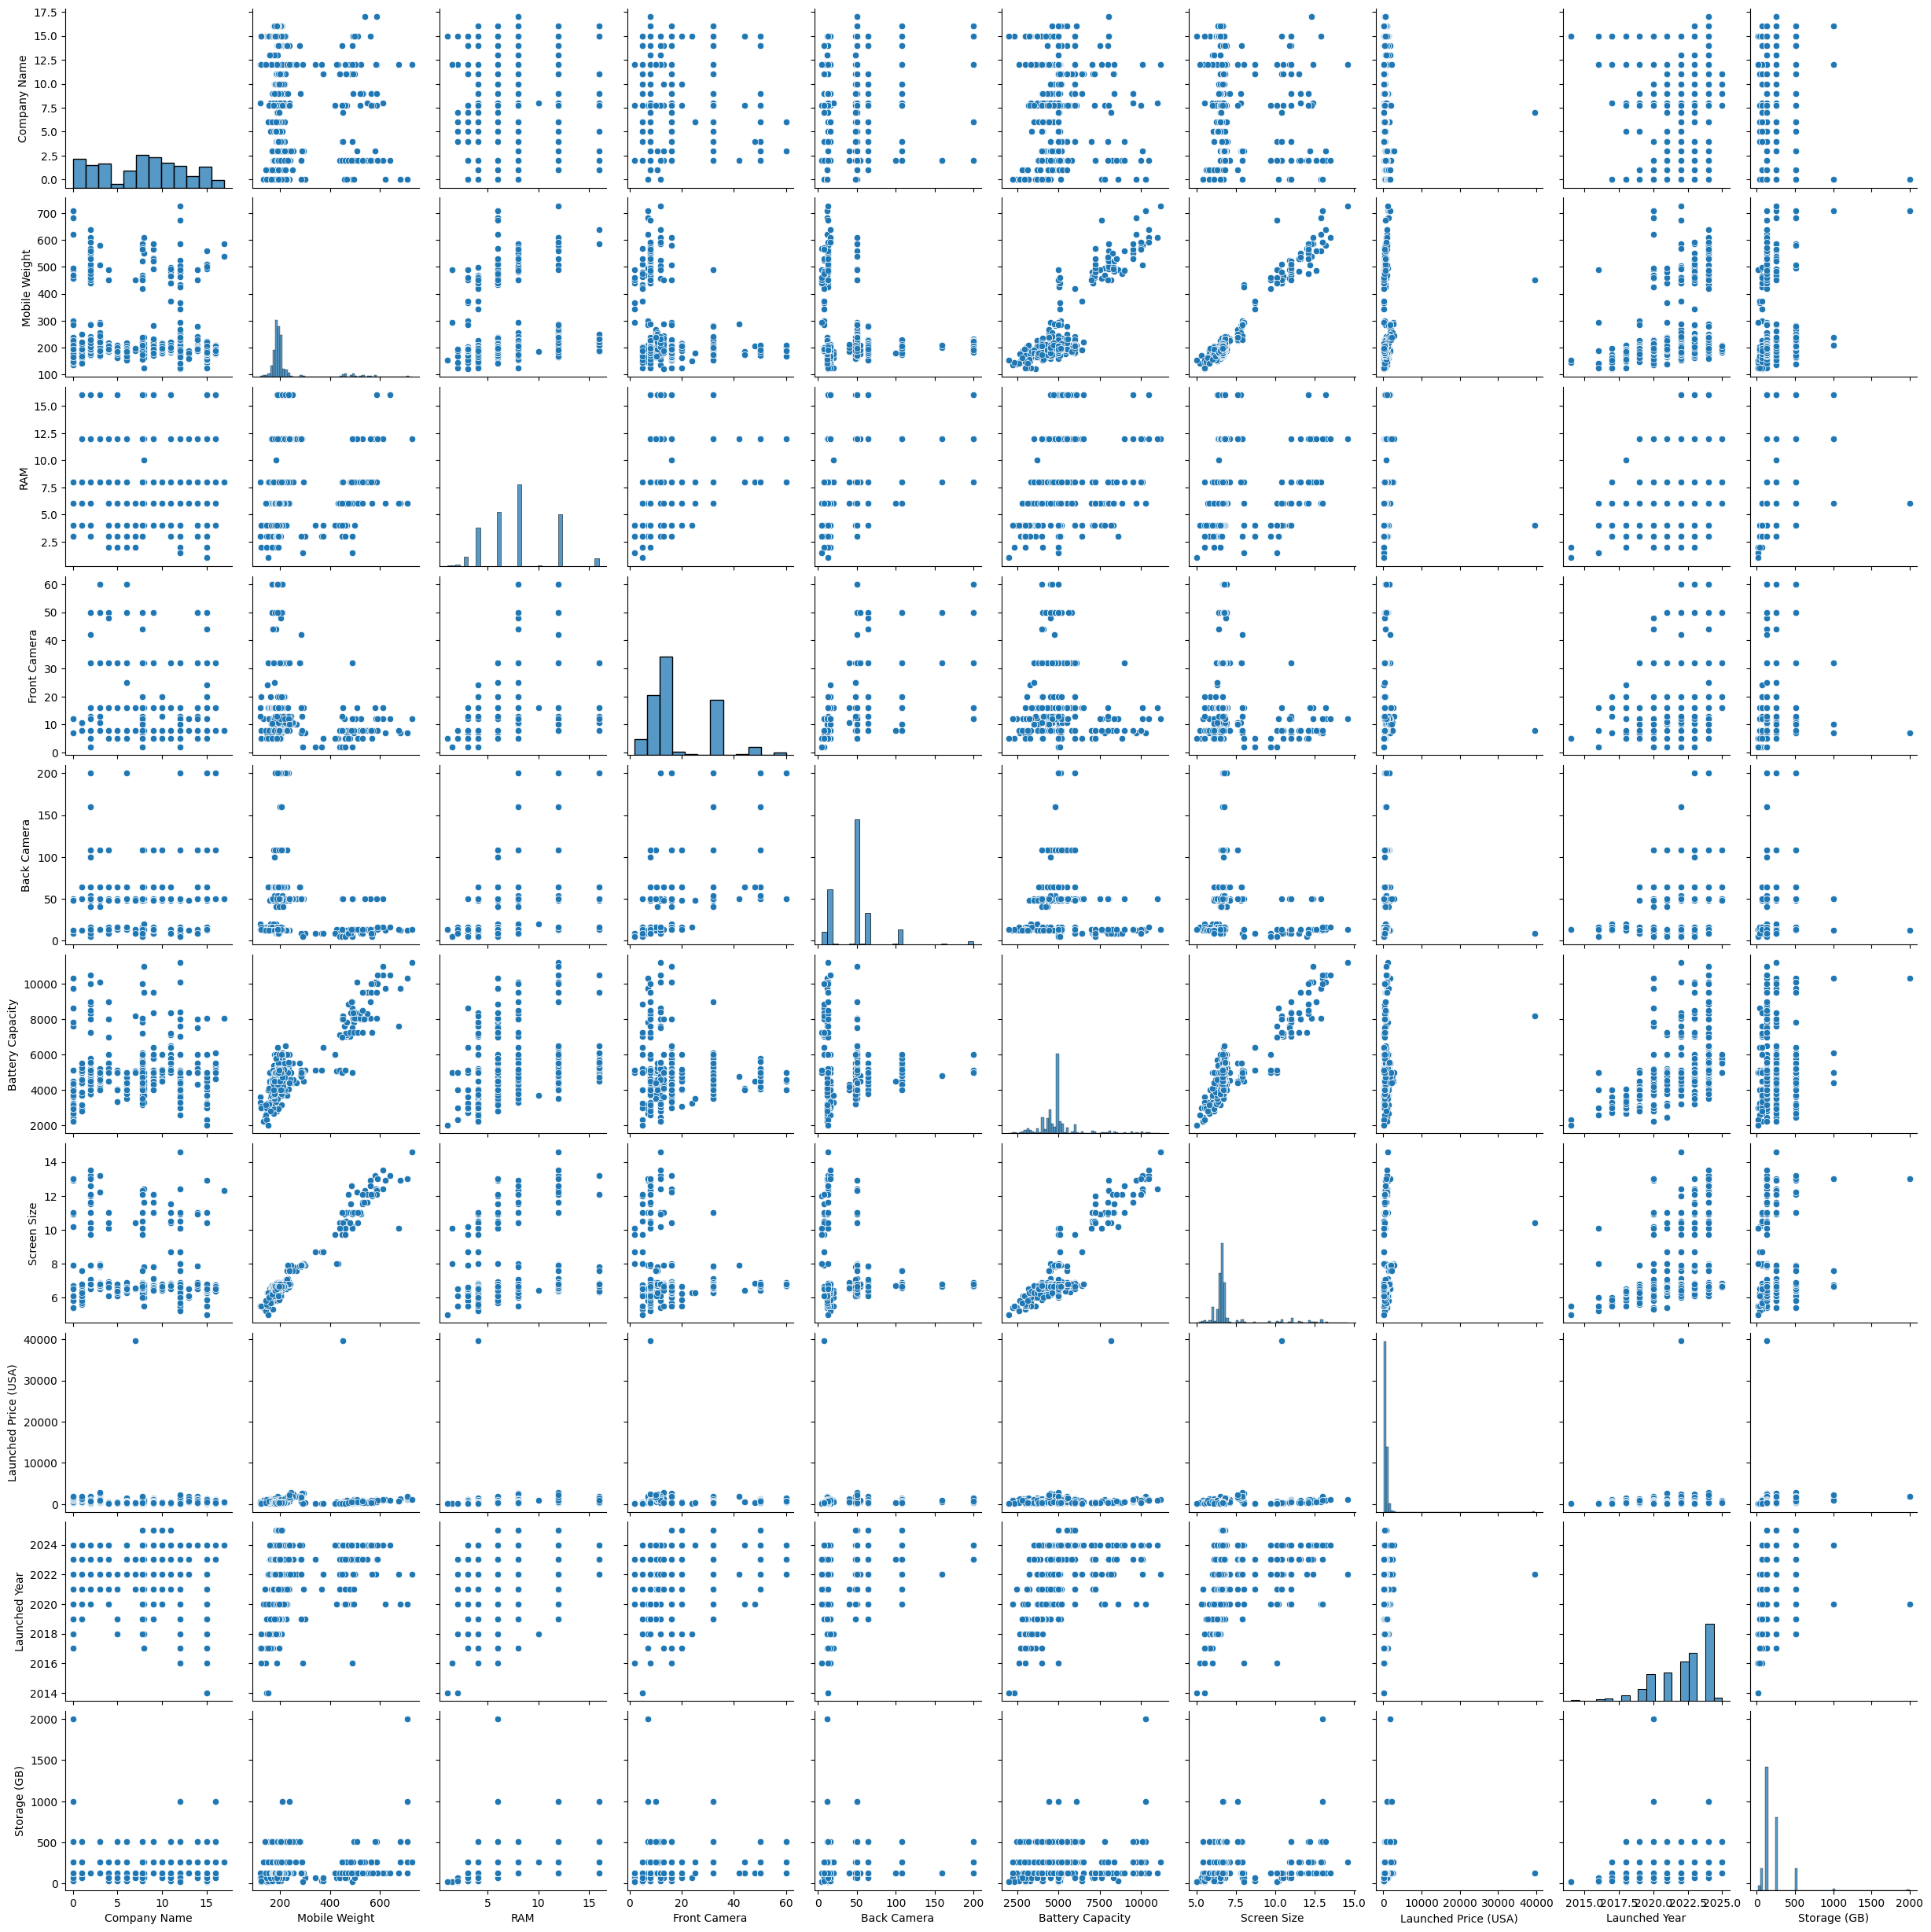

In [120]:
sns.pairplot(df)

In [121]:
X, y = df.drop(columns=["Launched Price (USA)"]), df["Launched Price (USA)"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)
regressor = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 186.83963963963964
MAPE: 0.3431289873612021
MSE: 99830.83243243243
RMSE: 315.96017538992544
R2 Score: 0.47105842414213184


In [122]:
regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 475.0636781498104
MAPE: 1.346329612557228
MSE: 6356984.2238287665
RMSE: 2521.3060551683857
R2 Score: -32.68171106187445


In [129]:
regressor = RandomForestRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 97.58113770913769
MAPE: 0.2098202596149045
MSE: 26742.028069205124
RMSE: 163.5298996184035
R2 Score: 0.8583106028076616


In [128]:
regressor = XGBRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 85.0224347088788
MAPE: 0.17366968923044676
MSE: 20837.164062656124
RMSE: 144.35083672308977
R2 Score: 0.8895968096512674


In [130]:
param_grid = {
    "n_neighbors": range(2, 10 + 1),
}

In [131]:
regressor = KNeighborsRegressor()

In [132]:
grid_search = GridSearchCV(
    regressor,
    param_grid,
    scoring="r2",
    cv=5,
)

In [133]:
grid_search.fit(train_X, train_y)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(2, 11)}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,2


In [134]:
grid_search.best_params_

{'n_neighbors': 2}

In [135]:
pred_y = grid_search.predict(test_X)

In [136]:
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 181.84864864864866
MAPE: 0.3365396828929287
MSE: 96382.03243243243
RMSE: 310.4545577575443
R2 Score: 0.48933147328307014


In [ ]:
#XGBRegressor dava najdobar rezultat (zatoa sto nema mnogu linearnost vo datasetot).